In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from AdamANN import AdamANN_clf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from plotting_functions import multidigits_plot, plot_decision_boundary

%matplotlib inline

# 1 Introduction

After having followed the three first courses of the Deep Learning Specialization on Coursera\*, I decided to spend some time using what I learned to create my own Artificial Neural Network in Python. 

The quality of these courses was very high, I really enjoyed following them. The theorie was very well explained but the exercises were far too easy. That's what pushed me to take a break and try to implement what I learned by creating a Python class that let me create with the maximum flexibility ANNs.

In the next section, I introduce my model and then test it on a couple of simple dataset. Then, I test it on the MNIST dataset, to make him learn to classify pictures of digit.

\* *https://www.coursera.org/specializations/deep-learning*

# 2 Model test
## 2.1 Introduction to my customizable Artificial Neural Network classifier

After having spent ~5 days coding my own class of Artificial Neural Network classifier, I spent some time playing with this nice toy with a few simple datasets, as well as with the famous MNIST dataset.

My model, **AdamANN_clf**, is completely customizable, the options are :
- **number of layers**
- **number of hidden units** per layer
- **activation function** for the hidden layers
- **parameter $\alpha$ for weight decay**, using L2 regularization
- **probability of dropout**, another method of regularization
- **number of epoch** (iteration of gradient descent through the complete training set)
- **learning rate** for the gradient descent
- **learning rate decay**, to slowly decrease the learning rate after each epoch
- **mini-batch size** to split the dataset in multiple mini-batch, which increase the learning speed by allowing a lower number of epoch
- **$\beta_1$** the parameter of weight averaging for gradient descent with momentum
- **$\beta_2$** the parameter of weight averaging for RMS prop

Also, I have implemented gradient checking (deactivated by default, because of its slowness), to check if my implementation of back propagation was correct (which is the case !).

## 2.2 Playing time
Before tackling the MNIST dataset, I will showcase the capabilities of my ANN on much simpler datasets.

In [2]:
# sklearn function to generate random 2 dimensionnal data
from sklearn.datasets import make_blobs, make_moons

### 2.2.1 Moons data

This randomly generated data is often used to test the non-linear classification abilities of a classifier.

Cost function after epoch 20 : 0.19669372695575266
Time : 0.218 s
Train accuracy : 0.996


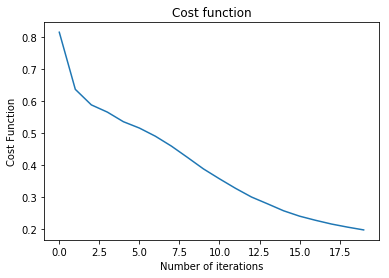

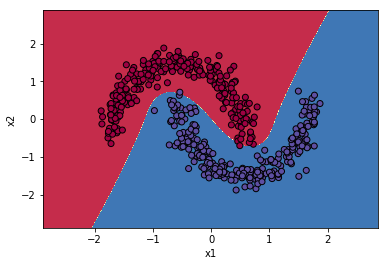

In [3]:
X,y = make_moons(500, noise=0.1)

normalizer = StandardScaler()
X = normalizer.fit_transform(X)

# set hyperparameters
hidden_units = [200,100]
hidden_func = 'tanh'
alpha = 0.1
p_dropout = 0
epoch = 20
learning_rate = 0.01
learn_decay = 1
batch_size = 128

ANN_clf = AdamANN_clf(hidden_units, hidden_func, alpha, p_dropout, epoch, learning_rate, 
                     learn_decay, batch_size)

ANN_clf.fit(X, y)

y_pred = ANN_clf.predict(X)

train_accuracy = accuracy_score(y, y_pred)

print('Train accuracy :', train_accuracy)

plt.figure()
plot_decision_boundary(ANN_clf, X, y)

We see that using a small amount of L2 regularization and the tanh activation function can get us a very smooth decision boundary

### 2.2.2 Blobs

This data, also generated randomly, let us generate random blobs of data points. When the number of blobs generated is more than 2, non-linear decision boundaries become necessary.

Cost function after epoch 200 : 0.34820387575208733
Time : 0.613 s
Train accuracy : 0.868


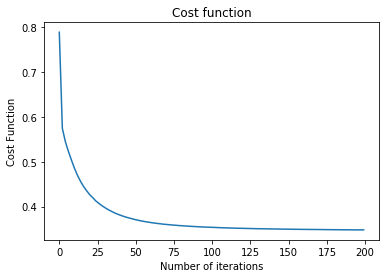

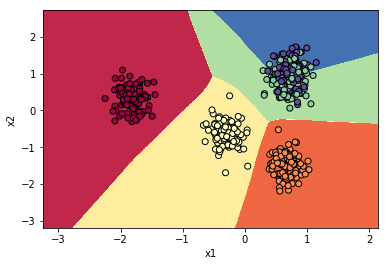

In [4]:
X,y = make_blobs(500,2,5)

normalizer = StandardScaler()
X = normalizer.fit_transform(X)

# set hyperparameters
hidden_units = [100,50]
hidden_func = 'relu'
alpha = 0.2
p_dropout = 0
epoch = 200
learning_rate = 0.01
learn_decay = 10
batch_size = 128

ANN_clf = AdamANN_clf(hidden_units, hidden_func, alpha, p_dropout, epoch, learning_rate, 
                     learn_decay, batch_size)

ANN_clf.fit(X, y)

y_pred = ANN_clf.predict(X)

train_accuracy = accuracy_score(y, y_pred)

print('Train accuracy :', train_accuracy)

plt.figure()
plot_decision_boundary(ANN_clf, X, y)

It's almost art !

## 2.3 MNIST

After having played a bit, I'll now tackle the MNIST dataset which is much more challenging, with his 60 000 images of digits in 28*28 pixels.

### 2.3.1 Prepare the data

In this section, I load the MNIST data set and create a training, cross-validation and test set.
I also normalize the data, which is an important step to accelerate the training speed.

In [5]:
# load MNIST
path = 'Data/MNIST/'

mnist_train = pd.read_csv(path+'mnist_train.csv', header=None)
mnist_test = pd.read_csv(path+'mnist_test.csv', header=None)

In [6]:
mnist_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train = mnist_train.drop(0, axis=1)
y_train = mnist_train[0]

X_test = mnist_test.drop(0, axis=1)
y_test = mnist_test[0]

In [8]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('Number of training samples :', len(X_train))
print('Number of cross-validation samples :', len(X_cv))
print('Number of test samples :', len(X_test))

Number of training samples : 48000
Number of cross-validation samples : 12000
Number of test samples : 10000


In [9]:
# normalize the data
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_cv = normalizer.transform(X_cv)
X_test = normalizer.transform(X_test)

### 2.3.2 Models test on MNIST

We'll first see what can a very simple neural network can do, using only one layer of 100 units and no regularization.

## First model : One hidden layer (100 units), ReLU and no regularization

Cost function after epoch 10 : 0.010345658718163488
Time : 5.656 s
train accuracy :  0.997916666667
CV accuracy :  0.971


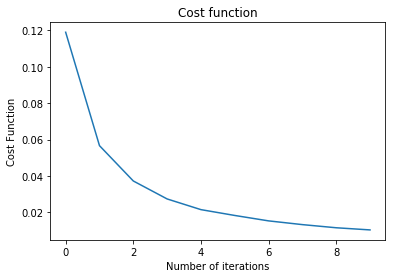

In [10]:
# set hyperparameters
hidden_units = [100]
hidden_func = 'relu'
alpha = 0
p_dropout = 0
epoch = 10
learning_rate = 0.01
learn_decay = 10
batch_size = 512

ANN_clf1 = AdamANN_clf(hidden_units, hidden_func, alpha, p_dropout, epoch, learning_rate, 
                     learn_decay, batch_size)

ANN_clf1.fit(X_train, y_train)

y_train_pred = ANN_clf1.predict(X_train)
y_cv_pred = ANN_clf1.predict(X_cv)

train_acc = accuracy_score(y_train_pred, y_train)
cv_acc = accuracy_score(y_cv_pred, y_cv)

print('train accuracy : ', train_acc)
print('CV accuracy : ', cv_acc)

#print(classification_report(y_cv, y_cv_pred))

As we can see, the results are already very good, and only 6 seconds of training time ! 

But we have a lot of overfitting going on, so we need to do some regularization. I found out that using 2 layers can get me some better results, but it needs a longer time to be trained.

## Second model : Two hidden layers (100 and 50 units), ReLU and regularization

Cost function after epoch 100 : 0.08713543525469872
Time : 69.497 s
train accuracy :  0.998395833333
CV accuracy :  0.978666666667


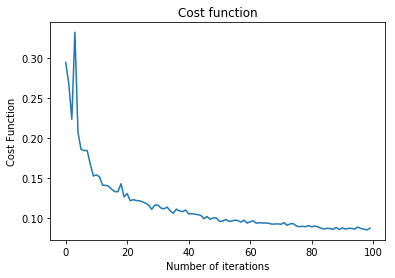

In [11]:
# set hyperparameters
hidden_units = [100,50]
hidden_func = 'relu'
alpha = 0.25
p_dropout = 0.01
epoch = 100
learning_rate = 0.01
learn_decay = 20
batch_size = 512

ANN_clf2 = AdamANN_clf(hidden_units, hidden_func, alpha, p_dropout, epoch, learning_rate, 
                     learn_decay, batch_size)

ANN_clf2.fit(X_train, y_train)

y_train_pred = ANN_clf2.predict(X_train)
y_cv_pred = ANN_clf2.predict(X_cv)

train_acc = accuracy_score(y_train_pred, y_train)
cv_acc = accuracy_score(y_cv_pred, y_cv)

print('train accuracy : ', train_acc)
print('CV accuracy : ', cv_acc)

#print(classification_report(y_cv, y_cv_pred))

The results are pretty good, sometimes this model can get me 98 % accuracy, but the random initialization of the parameters cause the model to get different levels of performance each time I retrain it.

Let's try to increase dramatically the number of units.

## Third model : Two hidden layers (800 and 800 units), ReLU and regularization

Cost function after epoch 30 : 0.09223165265417663
Time : 504.832 s
train accuracy :  0.9981875
CV accuracy :  0.977583333333


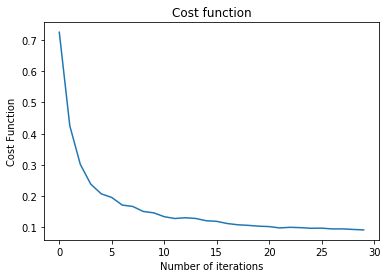

In [12]:
# set hyperparameters
hidden_units = [800,800]
hidden_func = 'relu'
alpha = 0.25
p_dropout = 0.01
epoch = 30
learning_rate = 0.01
learn_decay = 20
batch_size = 512

ANN_clf3 = AdamANN_clf(hidden_units, hidden_func, alpha, p_dropout, epoch, learning_rate, 
                     learn_decay, batch_size)

ANN_clf3.fit(X_train, y_train)

y_train_pred = ANN_clf3.predict(X_train)
y_cv_pred = ANN_clf3.predict(X_cv)

train_acc = accuracy_score(y_train_pred, y_train)
cv_acc = accuracy_score(y_cv_pred, y_cv)

print('train accuracy : ', train_acc)
print('CV accuracy : ', cv_acc)

#print(classification_report(y_cv, y_cv_pred))

This more complicated model has a big increase in training time, without showing any sign of improvement for the accuracy on the cross-validation set.

Choosing between our 3 models, I will keep the second one. It gives similar performance to the last model while keeping the training time much shorter.

### 2.3.3 Performance assessement on the test set

Now that we have choosed our models using the performance on the cross-validation set, we can retrain the model on the training + cross-validation set and assess the performance on the test set.

Cost function after epoch 100 : 0.30449137185607433
Time : 83.572 s
train-cv accuracy :  0.9981
test accuracy :  0.9804
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.98      0.99      0.99      1135
          2       0.97      0.98      0.97      1032
          3       0.97      0.99      0.98      1010
          4       0.99      0.98      0.98       982
          5       0.98      0.98      0.98       892
          6       0.99      0.98      0.98       958
          7       0.98      0.97      0.97      1028
          8       0.98      0.98      0.98       974
          9       0.98      0.97      0.98      1009

avg / total       0.98      0.98      0.98     10000



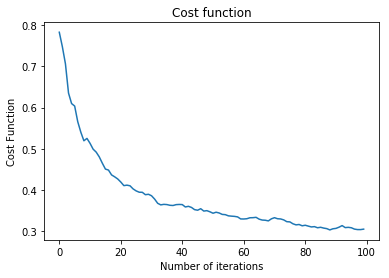

In [13]:
X_train_cv = np.concatenate((X_train, X_cv))
y_train_cv = np.concatenate((y_train, y_cv))

ANN_clf2.fit(X_train_cv, y_train_cv)

y_train_cv_pred = ANN_clf2.predict(X_train_cv)
y_test_pred = ANN_clf2.predict(X_test)

train_cv_acc = accuracy_score(y_train_cv_pred, y_train_cv)
test_acc = accuracy_score(y_test_pred, y_test)

print('train-cv accuracy : ', train_cv_acc)
print('test accuracy : ', test_acc)

print(classification_report(y_test, y_test_pred))

98 % accuracy, pretty solid result for a "simple" neural network.

### 2.3.4 Errors analysis

It's always important to check the errors of your model if you want to be able to improve it. Here I'll get a quick look at the digits misclassified.

196 errors, out of 12000 samples in the test set


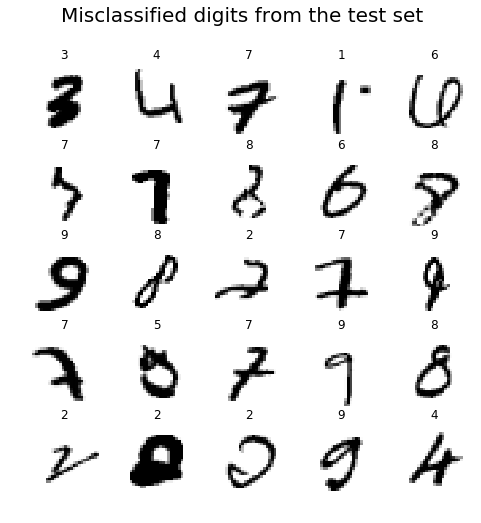

In [14]:
errors_idx = (y_test != y_test_pred)
print('{} errors, out of {} samples in the test set'.format(errors_idx.sum(), len(y_cv)))

X_test_errors = X_test[errors_idx]
y_test_errors = y_test.values[errors_idx]

# selected n different index of the errors 
n = 25
random_idx = np.random.choice(np.arange(len(X_test_errors)), size=n, replace=False)

# do the inverse transformation of the normalization
digits = normalizer.inverse_transform(X_test_errors[random_idx])
targets = y_test_errors[random_idx]

# plot the digits
titles = targets
multidigits_plot(digits, titles=titles)
plt.suptitle('Misclassified digits from the test set', fontsize=20);

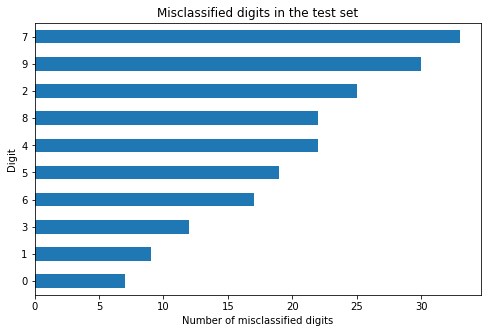

In [15]:
# frequency of the errors for the test set
plt.figure(figsize=(8,5))
pd.Series(y_test_errors).value_counts(ascending=True).plot.barh()

plt.title('Misclassified digits in the test set')
plt.ylabel('Digit')
plt.xlabel('Number of misclassified digits');

We can see that some of thesse digits are poorly written, but it's still easy to recognize them for most of them, so it's not 
a good excuse to explain the reason of the errors of our model.

Some pattern of these digits :
- some of them are written very thickly
- some are rotated and not straight

We could use this information to try to increase accuracy.
We could also do some data augmentation i.e. adding new data by transforming the original data, for example : 
- rotating the digits
- moving them to the side or up and down
- distording the digits

# 3 Conclusion

After taking the 3 first courses of the Deep Learning Specialization on Coursera, which detailed the theorie behind deep neural network and how to optimize them, I wanted to try to implement by myself in Python what I learned.

I created a very customizable neural network classifier and implemented different optimization algorithm, **Adam** and **mini-batch** gradient descent for example. Without using these methods, it would have taken ages to train a sophisticated neural network, but using them has let my model train itself on the MNIST dataset quite fast.

It would be interesting now to create a similar model using Tensorflow (which use the GPU to accelerate training speed, rather than using only the CPU, like my model does), and compare the training speed.

I also learned about the Batch Normalization algorithm, which I didn't tried tried to implement. It would be interesting to do, because the paper which introduced this method talks about a huge training speed boost (more than 10 times faster) as well as some positive regularization effects which could improve performance.